In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import collections

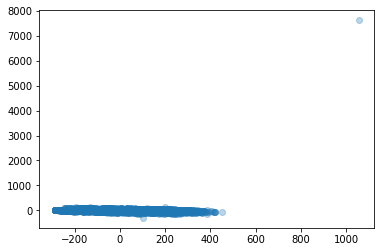

In [61]:
X = pd.read_csv('../ChangedDataSource.csv')
y = pd.read_csv('../ChangedTarget.csv')

X.drop(['ID'], axis = 1, inplace = True)
y_vector = []
for colname in y:
    if colname != 'ID':
        y_vector.append(y[colname].values)

# Use only the 4th entry in y_vector as target
X_total, y_total = X.values, y_vector[4]

# PCA of X_total
pca2 = PCA(2)
PCA2_X_test = pca2.fit_transform(X_total)

fig_unclustered = plt.figure()
plt.scatter(PCA2_X_test[:, 0], PCA2_X_test[:, 1], alpha=0.3)
plt.show()

In [62]:
print (len(y_total))
print (X_total.shape)

4971
(4971, 478)


In [63]:
outlier_i = []

for i in range(len(PCA2_X_test)):
    if PCA2_X_test[i][0] > 600:
        outlier_i.append(i)

X_total = np.delete(X_total, outlier_i, axis=0)
y_total = np.delete(y_total, outlier_i)

X_01norm = np.array(X_total)
X_Gnorm = np.array(X_total)

# 0-1 normalization
for i in range(len(X_01norm[0])):
    curmin, curmax = min(X_01norm[:, i]), max(X_01norm[:, i])
    if curmin == curmax:
        X_01norm[:, i] -= curmin
    else:
        X_01norm[:, i] = (X_01norm[:, i] - curmin) / (curmax - curmin)
print (X_01norm)
print (X_Gnorm)

[[0.         0.         0.         ... 0.46354085 0.58780516 0.49145861]
 [0.         0.         0.         ... 0.45913047 0.57089133 0.49210158]
 [0.         0.         0.         ... 0.45913047 0.57089133 0.65125975]
 ...
 [0.         0.         0.         ... 0.45913047 0.57089133 0.48747245]
 [0.         0.         0.         ... 0.45913047 0.57089133 0.51708914]
 [0.         0.         0.         ... 0.45913047 0.55990338 0.39973585]]
[[ 0.          0.          0.         ...  0.04619305  0.17342962
   0.18341062]
 [ 0.          0.          0.         ...  0.          0.
   0.18934808]
 [ 0.          0.          0.         ...  0.          0.
   1.65906361]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.14660123]
 [ 0.          0.          0.         ...  0.          0.
   0.42009083]
 [ 0.          0.          0.         ...  0.         -0.11266728
  -0.66358558]]


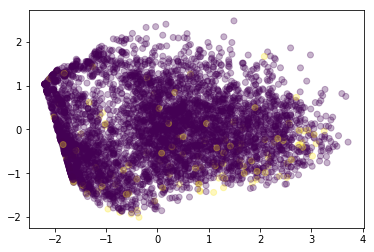

In [64]:
pca2 = PCA(2)
PCA2_X = pca2.fit_transform(X_01norm)

fig_unclustered_normalized = plt.figure()
plt.scatter(PCA2_X[:, 0], PCA2_X[:, 1], c = y_total, alpha = 0.3)
plt.show()

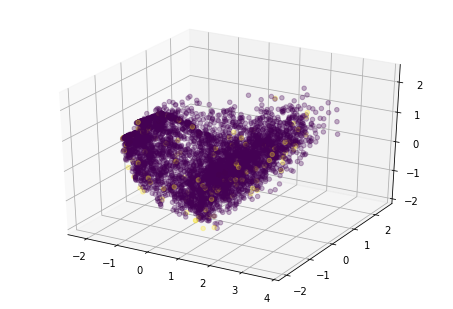

In [65]:
pca3 = PCA(3)
PCA3_X = pca3.fit_transform(X_01norm)

fig_unclustered3d = plt.figure()
ax = Axes3D(fig_unclustered3d)
ax.scatter(PCA3_X[:, 0], PCA3_X[:, 1], PCA3_X[:, 2], c = y_total, alpha = 0.3)
plt.show()

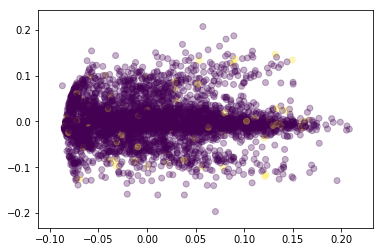

In [66]:
# Use sklearn preprocessing (Gaussian normalization)
X_Gnorm = normalize(X_Gnorm, axis = 0)
PCA2G_X = pca2.fit_transform(X_Gnorm)

fig_unclustered_G_normalized = plt.figure()
plt.scatter(PCA2G_X[:, 0], PCA2G_X[:, 1], c = y_total, alpha = 0.3)
plt.show()

In [67]:
# Perform Hierarchical Clustering using AgglomerativeClustering in sklearn
# Try different linkage criterions
complete = AgglomerativeClustering(n_clusters = 2, linkage = 'complete').fit(X_Gnorm)
average = AgglomerativeClustering(n_clusters = 2, linkage = 'average').fit(X_Gnorm)
ward = AgglomerativeClustering(n_clusters = 2, linkage = 'ward').fit(X_Gnorm)
    
complete_label = complete.labels_
average_label = average.labels_
ward_label = ward.labels_

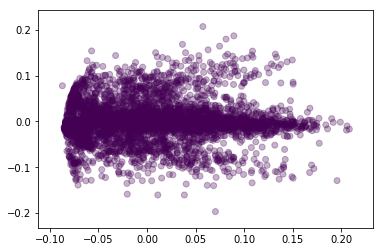

In [68]:
fig_unclustered_Gnorm_total = plt.figure()
plt.scatter(PCA2G_X[:, 0], PCA2G_X[:, 1], c = complete_label, alpha = 0.3)
plt.show()

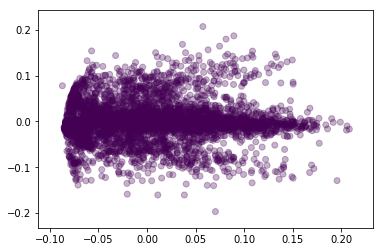

In [69]:
fig_unclustered_Gnorm_ward = plt.figure()
plt.scatter(PCA2G_X[:, 0], PCA2G_X[:, 1], c = average_label, alpha = 0.3)
plt.show()

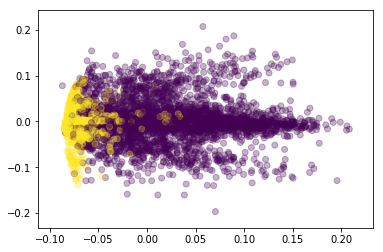

In [70]:
fig_unclustered_Gnorm_avg = plt.figure()
plt.scatter(PCA2G_X[:, 0], PCA2G_X[:, 1], c = ward_label, alpha = 0.3)
plt.show()

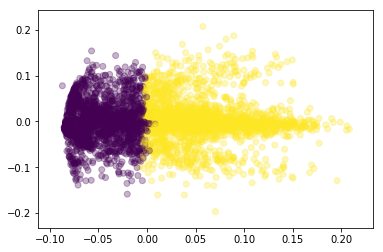

In [78]:
# K-Means Clustering
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(X_Gnorm)
kmeans_label = kmeans.labels_

fig_unclustered_kmean = plt.figure()
plt.scatter(PCA2G_X[:, 0], PCA2G_X[:, 1], c = kmeans_label, alpha = 0.3)
plt.show()

In [79]:
# Check the content of ward clustering
ward_unique, ward_counts = np.unique(ward_label, return_counts = True)
ward_count_dict = dict(zip(ward_unique, ward_counts))
print (ward_count_dict)

ward_content_check = collections.defaultdict(lambda: collections.defaultdict(int))
for i in range(len(ward_label)):
    ward_content_check[ward_label[i]][y_total[i]] += 1
print (ward_content_check)

{0: 3793, 1: 1177}
defaultdict(<function <lambda> at 0x11b076d08>, {1: defaultdict(<class 'int'>, {0.0: 1147, 1.0: 30}), 0: defaultdict(<class 'int'>, {0.0: 3693, 1.0: 100})})


In [80]:
# Check the content of KMeans clustering
kmeans_unique, kmeans_counts = np.unique(kmeans_label, return_counts = True)
kmeans_count_dict = dict(zip(kmeans_unique, kmeans_counts))
print (kmeans_count_dict)

kmeans_content_check = collections.defaultdict(lambda: collections.defaultdict(int))
for i in range(len(kmeans_label)):
    kmeans_content_check[kmeans_label[i]][y_total[i]] += 1
print (kmeans_content_check)

{0: 2566, 1: 2404}
defaultdict(<function <lambda> at 0x11b076620>, {0: defaultdict(<class 'int'>, {0.0: 2506, 1.0: 60}), 1: defaultdict(<class 'int'>, {0.0: 2334, 1.0: 70})})


In [81]:
# Try T_SNE
from sklearn.manifold import TSNE

Embedded_X_Gnorm = TSNE(n_components = 2).fit_transform(X_Gnorm)
print (Embedded_X_Gnorm.shape)

(4970, 2)


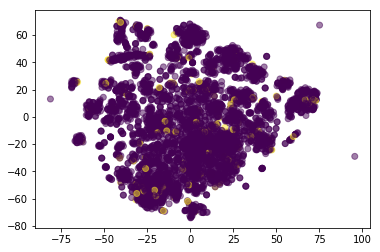

In [82]:
fig_TSNE1 = plt.figure()
plt.scatter(Embedded_X_Gnorm[:, 0], Embedded_X_Gnorm[:, 1], c = y_total, alpha = 0.5)
plt.show()

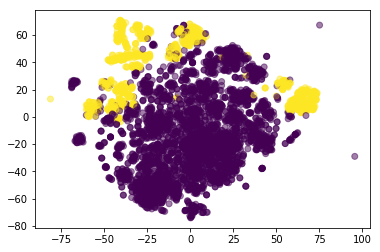

In [83]:
fig_TSNE2 = plt.figure()
plt.scatter(Embedded_X_Gnorm[:, 0], Embedded_X_Gnorm[:, 1], c = ward_label, alpha = 0.5)
plt.show()

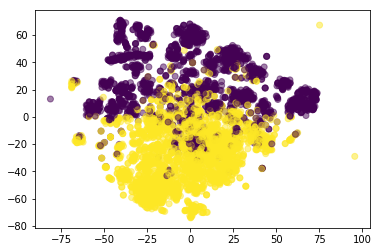

In [84]:
fig_TSNE3 = plt.figure()
plt.scatter(Embedded_X_Gnorm[:, 0], Embedded_X_Gnorm[:, 1], c = kmeans_label, alpha = 0.5)
plt.show()